In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sb\
 
# plt.rcParams['figure.figsize'] = (5.0, 2.0)

In [4]:
# Pima Indians Diabetes 

df = pd.read_csv("/Users/jj/PycharmProjects/springboard2/capstone_project_2/data/diabetes.csv", sep=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# number of Outcomes
# 768 total = 500 unaffected + 268 affected
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c5694a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c7c8160>]], dtype=object)

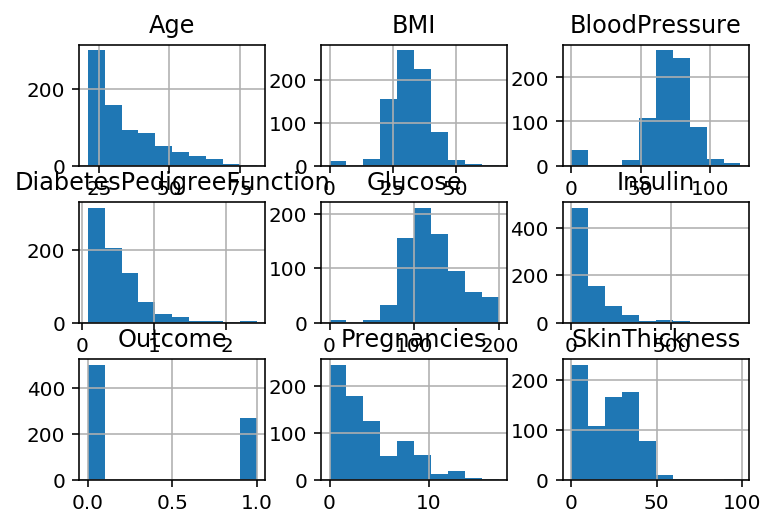

In [11]:
df.hist()

In [12]:
# x = df.columns[0: len(df.columns)-1]
x = df

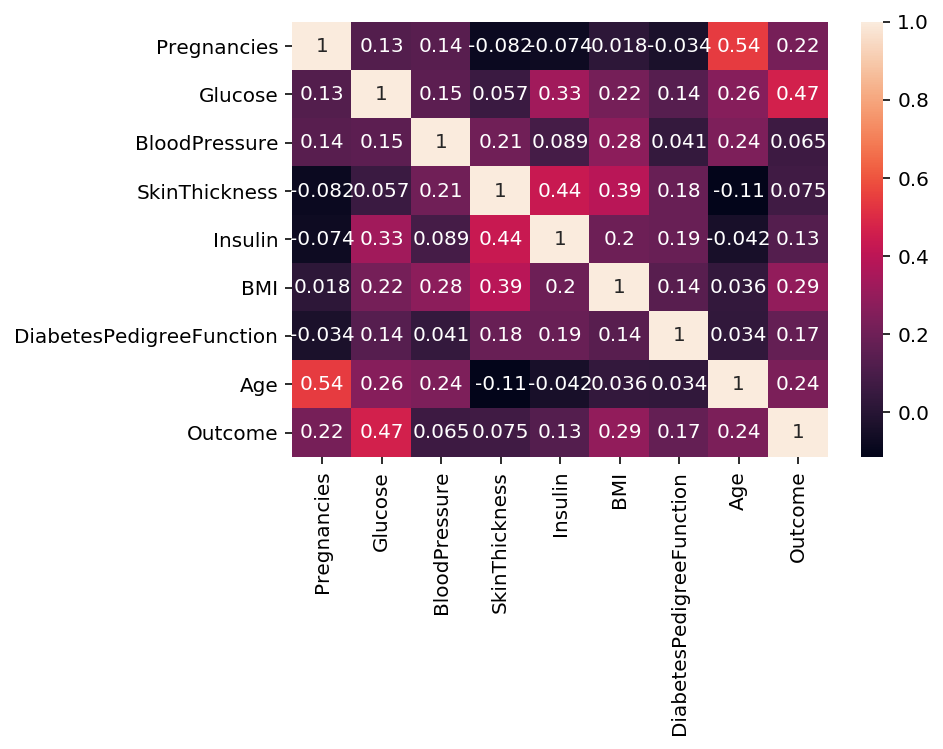

In [13]:
corr = df[df.columns].corr()
sb.heatmap(corr, annot=True)

# Feature Selection methods comparison on Pima Indian datasets


### Univariate Selection


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x1 = df.iloc[:, :-1]
y1 = df.iloc[:, 8]

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit1 = test.fit(x1, y1)

# summarize scores
np.set_printoptions(precision=3)
scores = fit1.scores_
score_summary_df = pd.DataFrame([scores], columns=x1.columns)
score_summary_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


In [18]:
# Looks like Glucose, Insulin, BMI, Age is the key features.

features = fit1.transform(x1)
features_df_1 = pd.DataFrame(features, columns=['Glucose', 'Insulin', 'BMI', 'Age'])
features_df_1.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


### Recursive Feature Elimination


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x2 = df.iloc[:, :-1]
y2 = df.iloc[:, 8]

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit2 = rfe.fit(x2.values, y2.values)

print("Num Features: %d" % fit2.n_features_)
print("Selected Features: %s" % fit2.support_)
print("Feature Ranking: %s" % fit2.ranking_)

rfe_feature_df = pd.DataFrame([fit2.support_, fit2.ranking_], columns=x2.columns)
rfe_feature_df

# Features

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,True,False,False,False,False,True,True,False
1,1,2,3,5,6,1,1,4


In [21]:
features_df_2 = x2[["Pregnancies", "BMI", "DiabetesPedigreeFunction"]]

features_df_2.head()

,Pregnancies,BMI,DiabetesPedigreeFunction
0,6,33.6,0.627
1,1,26.6,0.351
2,8,23.3,0.672
3,1,28.1,0.167
4,0,43.1,2.288


### Principal Component Analysis

#### Hard Way


In [30]:
# Standardization

# Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. 
# Since PCA yields a feature subspace that maximizes the variance along the axes, 
# it makes sense to standardize the data, especially, if it was measured on different scales. 
# Although, all features in the Iris dataset were measured in centimeters, 
# let us continue with the transformation of the data onto unit scale (mean=0 and variance=1),
#  which is a requirement for the optimal performance of many machine learning algorithms.

x3 = df.iloc[:, :-1]
y3 = df.Outcome

from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(x3)

X_std


[[ 0.64   0.848  0.15  ...,  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161 ..., -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 ..., -1.103  0.604 -0.106]
 ..., 
 [ 0.343  0.003  0.15  ..., -0.735 -0.685 -0.276]
 [-0.845  0.16  -0.471 ..., -0.24  -0.371  1.171]
 [-0.845 -0.873  0.046 ..., -0.202 -0.474 -0.871]]
[[ 0.64  -0.845  1.234 ...,  0.343 -0.845 -0.845]
 [ 0.848 -1.123  1.944 ...,  0.003  0.16  -0.873]
 [ 0.15  -0.161 -0.264 ...,  0.15  -0.471  0.046]
 ..., 
 [ 0.204 -0.684 -1.103 ..., -0.735 -0.24  -0.202]
 [ 0.468 -0.365  0.604 ..., -0.685 -0.371 -0.474]
 [ 1.426 -0.191 -0.106 ..., -0.276  1.171 -0.871]]


In [26]:
# Covariance Matrix

# This is more verbose way of getting Covariance matrix
# X_std.T means transposes. x axis to Y axis.

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

# This is less verbose way of getting Covariance Matrix using numpy
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix 
[[ 1.001  0.13   0.141 -0.082 -0.074  0.018 -0.034  0.545]
 [ 0.13   1.001  0.153  0.057  0.332  0.221  0.138  0.264]
 [ 0.141  0.153  1.001  0.208  0.089  0.282  0.041  0.24 ]
 [-0.082  0.057  0.208  1.001  0.437  0.393  0.184 -0.114]
 [-0.074  0.332  0.089  0.437  1.001  0.198  0.185 -0.042]
 [ 0.018  0.221  0.282  0.393  0.198  1.001  0.141  0.036]
 [-0.034  0.138  0.041  0.184  0.185  0.141  1.001  0.034]
 [ 0.545  0.264  0.24  -0.114 -0.042  0.036  0.034  1.001]]
NumPy covariance matrix: 
[[ 1.001  0.13   0.141 -0.082 -0.074  0.018 -0.034  0.545]
 [ 0.13   1.001  0.153  0.057  0.332  0.221  0.138  0.264]
 [ 0.141  0.153  1.001  0.208  0.089  0.282  0.041  0.24 ]
 [-0.082  0.057  0.208  1.001  0.437  0.393  0.184 -0.114]
 [-0.074  0.332  0.089  0.437  1.001  0.198  0.185 -0.042]
 [ 0.018  0.221  0.282  0.393  0.198  1.001  0.141  0.036]
 [-0.034  0.138  0.041  0.184  0.185  0.141  1.001  0.034]
 [ 0.545  0.264  0.24  -0.114 -0.042  0.036  0.034  1.001]]


In [31]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.128 -0.594 -0.589  0.118 -0.194  0.476 -0.081  0.013]
 [-0.393 -0.174 -0.06   0.45  -0.094 -0.466  0.404 -0.468]
 [-0.36  -0.184 -0.192 -0.011  0.634 -0.328 -0.056  0.535]
 [-0.44   0.332  0.282  0.566 -0.01   0.488 -0.038  0.238]
 [-0.435  0.251 -0.132 -0.549  0.271  0.347  0.35  -0.337]
 [-0.452  0.101 -0.035 -0.342 -0.685 -0.253 -0.054  0.362]
 [-0.271  0.122 -0.086 -0.008  0.086 -0.12  -0.834 -0.433]
 [-0.198 -0.621  0.712 -0.212  0.033  0.109 -0.071 -0.075]]

Eigenvalues 
[ 2.097  1.733  0.42   0.405  0.684  0.763  0.877  1.031]


In [37]:
# The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace,
# where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, 
# since they have all the same unit length 1, which can confirmed by the following two lines of code:

for ev in eig_vecs:
    print(np.linalg.norm(ev))
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("ok")

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ok


In [38]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.09711055799
1.73346725945
1.03097228101
0.876670541909
0.76333831565
0.683518385845
0.42036352805
0.404989377815


In [43]:
# https://plot.ly/ipython-notebooks/principal-component-analysis/

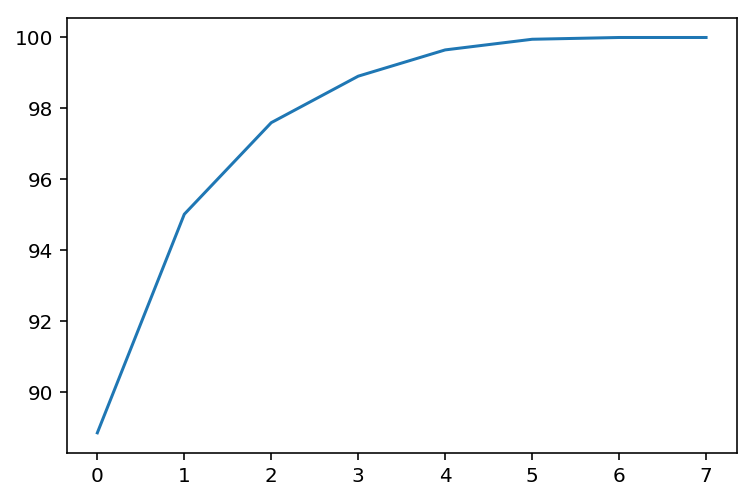

In [44]:
pca = PCA()
pca.fit_transform(x3.values)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
plt.plot(var)
plt.show()

In [127]:
pca_ = PCA(n_components=7)

y_sklearn = pca_.fit_transform(x3.values)

print(pca_.explained_variance_)
print(pca_.explained_variance_ratio_)
print(pca_.components_)

[  1.346e+04   9.328e+02   3.906e+02   1.982e+02   1.127e+02   4.583e+01
   7.761e+00]
[  8.885e-01   6.159e-02   2.579e-02   1.309e-02   7.441e-03   3.026e-03
   5.124e-04]
[[ -2.022e-03   9.781e-02   1.609e-02   6.076e-02   9.931e-01   1.401e-02
    5.372e-04  -3.565e-03]
 [ -2.265e-02  -9.722e-01  -1.419e-01   5.786e-02   9.463e-02  -4.697e-02
   -8.168e-04  -1.402e-01]
 [ -2.246e-02   1.434e-01  -9.225e-01  -3.070e-01   2.098e-02  -1.324e-01
   -6.400e-04  -1.255e-01]
 [ -4.905e-02   1.198e-01  -2.627e-01   8.844e-01  -6.555e-02   1.928e-01
    2.699e-03  -3.010e-01]
 [  1.516e-01  -8.794e-02  -2.322e-01   2.600e-01  -1.723e-04   2.147e-02
    1.641e-03   9.205e-01]
 [ -5.047e-03   5.074e-02   7.564e-02   2.214e-01  -6.133e-03  -9.708e-01
   -2.029e-03  -1.511e-02]
 [  9.867e-01   8.834e-04  -1.230e-03  -3.764e-04   1.423e-03  -2.730e-03
   -6.344e-03  -1.626e-01]]


In [128]:
pd.DataFrame(pca_.components_, columns=x3.columns, index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC-1,-0.002022,0.097812,0.016093,0.060757,0.993111,0.014011,0.000537,-0.003565
PC-2,-0.022649,-0.972210,-0.141909,0.057861,0.094627,-0.046973,-0.000817,-0.140168
PC-3,-0.022465,0.143429,-0.922467,-0.307013,0.020977,-0.132445,-0.000640,-0.125454
PC-4,-0.049046,0.119830,-0.262743,0.884369,-0.065550,0.192802,0.002699,-0.301024
PC-5,0.151613,-0.087941,-0.232165,0.259973,-0.000172,0.021474,0.001641,0.920505
PC-6,-0.005047,0.050739,0.075637,0.221363,-0.006133,-0.970777,-0.002029,-0.015113
PC-7,0.986673,0.000883,-0.001230,-0.000376,0.001423,-0.002730,-0.006344,-0.162555


array([[-75.715, -35.951,  -7.261, ...,  16.507,   3.46 ,  -0.702],
       [-82.358,  28.908,  -5.497, ...,   3.482,   5.59 ,  -2.572],
       [-74.631, -67.906,  19.462, ..., -10.3  ,   7.144,   4.279],
       ..., 
       [ 32.113,   3.377,  -1.588, ...,  -2.979,   6.239,   1.725],
       [-80.214, -14.186,  12.351, ...,   8.533,  -2.842,  -5.128],
       [-81.308,  21.621,  -8.153, ...,  -4.913,   3.173,  -1.28 ]])

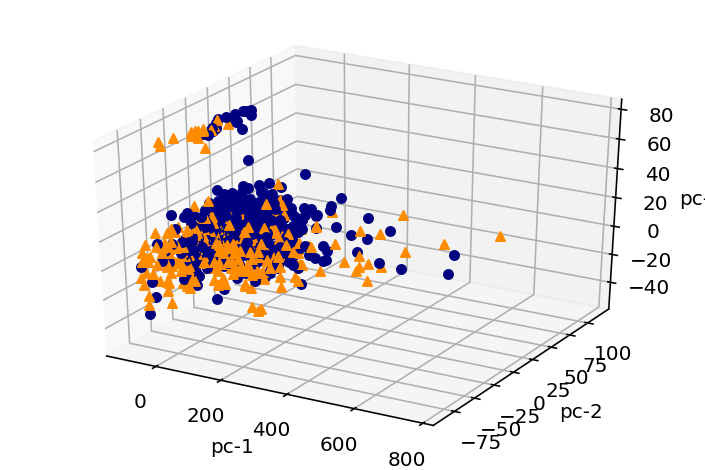

In [71]:
# y_sklearn

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c = ['navy', 'darkorange']
targets = y3.values

for y, target in zip(y_sklearn, targets):
    if target == 0:
        c = 'navy'
        m = 'o'
    else:
        c = 'darkorange'
        m = '^'
    ax.scatter(y[0], y[1], y[2], c=c, marker=m)

ax.set_xlabel('pc-1')
ax.set_ylabel('pc-2')
ax.set_zlabel('pc-3')

plt.show()

In [68]:
target_names = ['Not Affected', 'Affected']
colors = ['navy', 'darkorange']
lw = 1
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(y_sklearn[y == i, 0], y_sklearn[y==i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Pima Indians')
plt.figure()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 768 but corresponding boolean dimension is 6

### Feature Importance (4)



In [77]:
from sklearn.ensemble import ExtraTreesClassifier

x4 = df.iloc[:, :-1]
y4 = df.iloc[:, 8]

# feature extraction
model = ExtraTreesClassifier()
model.fit(x4, y4)
print(model.feature_importances_)

feature_importance_df = pd.DataFrame([model.feature_importances_], columns=x4.columns)
feature_importance_df

features_df_4 = x4[["Glucose", "BMI", "Age"]]
features_df_4.head()

[ 0.11   0.214  0.105  0.083  0.085  0.14   0.12   0.143]


,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


In [82]:
from sklearn.preprocessing import StandardScaler

scaled_x_1 = StandardScaler().fit_transform(features_df_1)
scaled_x_2 = StandardScaler().fit_transform(features_df_2)
scaled_x_4 = StandardScaler().fit_transform(features_df_4)

print(scaled_x_1)
print(scaled_x_2)
print(scaled_x_4)

print(features_df_1.head())
print(features_df_2.head())
print(features_df_4.head())

[[ 0.848 -0.693  0.204  1.426]
 [-1.123 -0.693 -0.684 -0.191]
 [ 1.944 -0.693 -1.103 -0.106]
 ..., 
 [ 0.003  0.28  -0.735 -0.276]
 [ 0.16  -0.693 -0.24   1.171]
 [-0.873 -0.693 -0.202 -0.871]]
[[ 0.64   0.204  0.468]
 [-0.845 -0.684 -0.365]
 [ 1.234 -1.103  0.604]
 ..., 
 [ 0.343 -0.735 -0.685]
 [-0.845 -0.24  -0.371]
 [-0.845 -0.202 -0.474]]
[[ 0.848  0.204  1.426]
 [-1.123 -0.684 -0.191]
 [ 1.944 -1.103 -0.106]
 ..., 
 [ 0.003 -0.735 -0.276]
 [ 0.16  -0.24   1.171]
 [-0.873 -0.202 -0.871]]
   Glucose  Insulin   BMI   Age
0    148.0      0.0  33.6  50.0
1     85.0      0.0  26.6  31.0
2    183.0      0.0  23.3  32.0
3     89.0     94.0  28.1  21.0
4    137.0    168.0  43.1  33.0
   Pregnancies   BMI  DiabetesPedigreeFunction
0            6  33.6                     0.627
1            1  26.6                     0.351
2            8  23.3                     0.672
3            1  28.1                     0.167
4            0  43.1                     2.288
   Glucose   BMI  Age
0     

In [130]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(scaled_x_1, y1, random_state=22, test_size=0.2)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(scaled_x_2, y1, random_state=22, test_size=0.2)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(y_sklearn, y1, random_state=22, test_size=0.2)
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(scaled_x_4, y1, random_state=22, test_size=0.2)

In [131]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [132]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [134]:
def binary_classification(models, X_train, Y_train):
    
    results = []
    names = []
    
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=22)
        cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        
    for i in range(len(names)):
        print(names[i], results[i].mean())
    
    return results, names

        
results_1, names_1 = binary_classification(models, X_train_1, Y_train_1)
results_2, names_2 = binary_classification(models, X_train_2, Y_train_2)
results_3, names_3 = binary_classification(models, X_train_3, Y_train_3)
results_4, names_4 = binary_classification(models, X_train_4, Y_train_4)


LR 0.776890534109
NB 0.760497091486
KNN 0.745928080381
DT 0.710259122158
SVM 0.776890534109


LR 0.687228979376
NB 0.690507667901
KNN 0.65798519302
DT 0.609069275516
SVM 0.706901110524


LR 0.780063458488
NB 0.757218402961
KNN 0.708302485457
DT 0.674193548387
SVM 0.651560021153
LR 0.780116340561
NB 0.773558963511
KNN 0.734426229508
DT 0.700317292438
SVM 0.775198307774


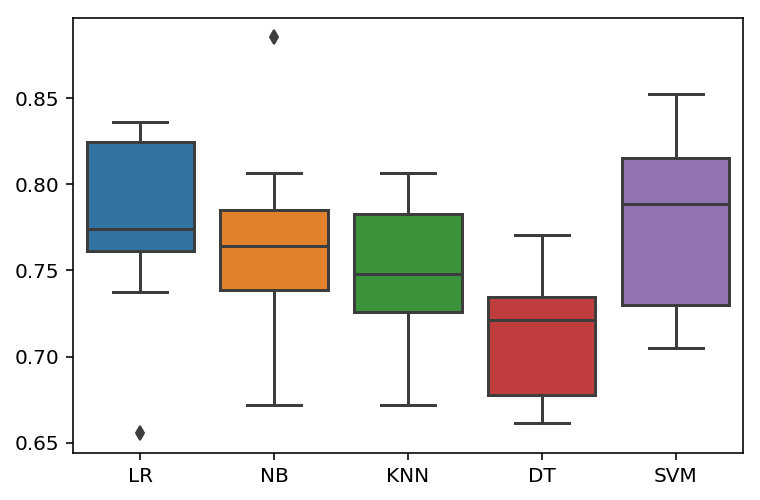

In [136]:
def visualize_results(results, names):
    ax = sb.boxplot(data=results)
    ax.set_xticklabels(names)

visualize_results(results_1, names_1)

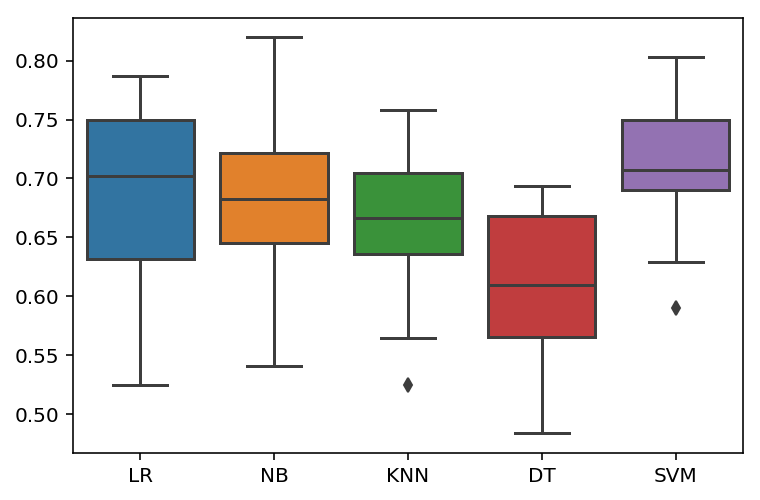

In [137]:
visualize_results(results_2, names_2)

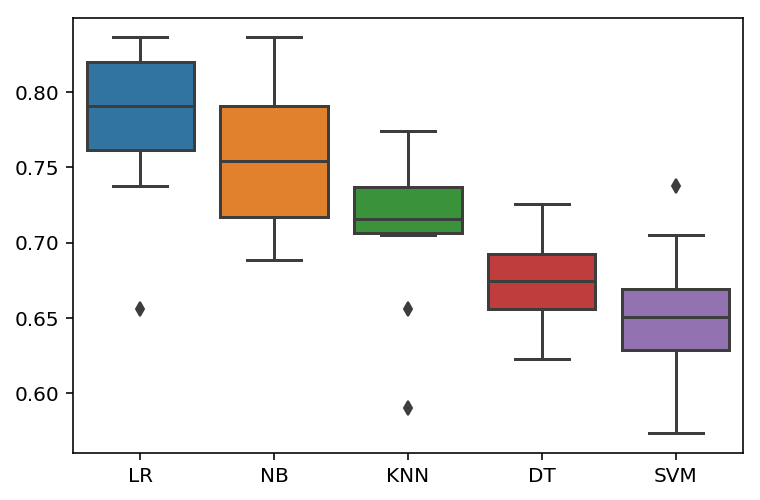

In [138]:
visualize_results(results_3, names_3)

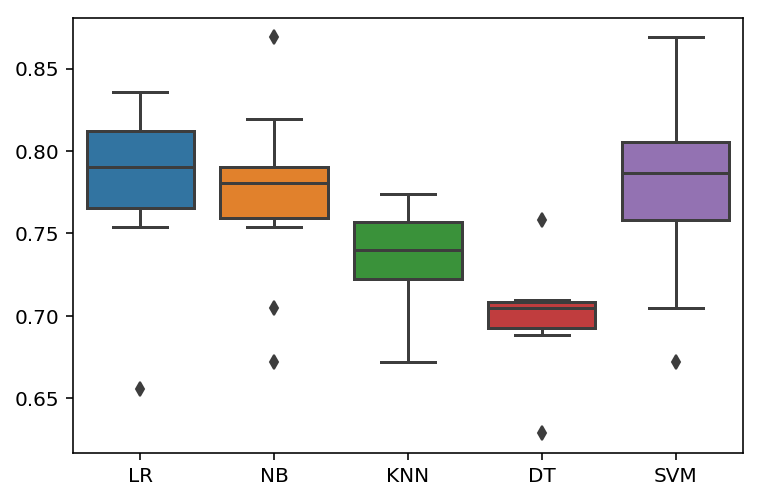

In [139]:
visualize_results(results_4, names_4)

### Final Prediction

It looks like Logistic Regression and SVM with Univariate Selection method works best. 


In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_1, Y_train_1)
predictions_1 = lr.predict(X_test_1)

print(accuracy_score(Y_test_1, predictions_1))

0.714285714286


In [124]:
svm = SVC()
svm.fit(X_train_1, Y_train_1)
predictions_1 = svm.predict(X_test_1)

print(accuracy_score(Y_test_1, predictions_1))

0.733766233766


In [125]:
print(classification_report(Y_test_1,predictions_1))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.72      0.39      0.51        54

avg / total       0.73      0.73      0.71       154



In [126]:
conf = confusion_matrix(Y_test_1, predictions_1)
print(conf)

[[92  8]
 [33 21]]
